Problem Statement:To predict the salary of the employees using the features provided in the dataset.

Data Description:Rank, discipline,yrs.since.phd,yrs.service,sex,salary are the required columns in the datasets.

Target:salary is the dependent variable 

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [3]:
df1=pd.read_csv("salary.csv")
df1

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
5,AssocProf,B,6,6,Male,97000
6,Prof,B,30,23,Male,175000
7,Prof,B,45,45,Male,147765
8,Prof,B,21,20,Male,119250
9,Prof,B,18,18,Female,129000


# DATA ANALYSIS

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [5]:
df1.head() #showing first five rows

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [6]:
df1.tail() #showing the last five rows

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [7]:
df1.shape

(397, 6)

In [8]:
df1.describe() #This shows only numercal non_object columns #(include='all'):- this shows all the columns

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [9]:
#Categorical Analysis
obj = ['rank', 'discipline','sex']
for column in df1[obj]:
    print(column.upper(),': ',df1[column].nunique())
    print(df1[column].value_counts().sort_values())
    print('\n')

RANK :  3
AssocProf     64
AsstProf      67
Prof         266
Name: rank, dtype: int64


DISCIPLINE :  2
A    181
B    216
Name: discipline, dtype: int64


SEX :  2
Female     39
Male      358
Name: sex, dtype: int64




# EDA- DATA VISUALIZATION

In [10]:
def univariateAnalysis_category(obj):
    print("Details of " + obj)
    print("----------------------------------------------------------------")
    print(df1[obj].value_counts())
    plt.figure()
    df1[obj].value_counts().plot.bar(title="Frequency Distribution of " + obj)#, color = "blue")
    plt.show()
    print("       ")

Details of rank
----------------------------------------------------------------
Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


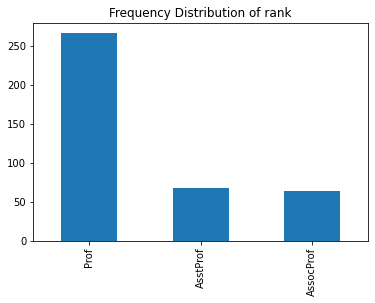

       
Details of discipline
----------------------------------------------------------------
B    216
A    181
Name: discipline, dtype: int64


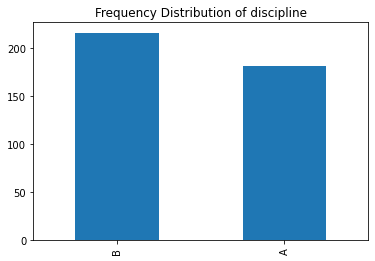

       
Details of sex
----------------------------------------------------------------
Male      358
Female     39
Name: sex, dtype: int64


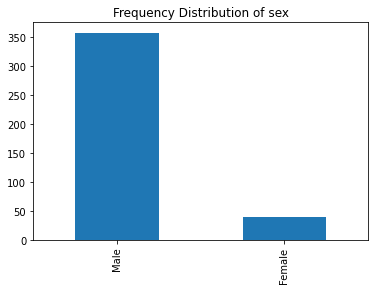

In [11]:
for x in obj:
    univariateAnalysis_category(x)

Thus we can see the details of the categorical columns above. 

In [12]:
#checking the null value in the dataset
df1.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

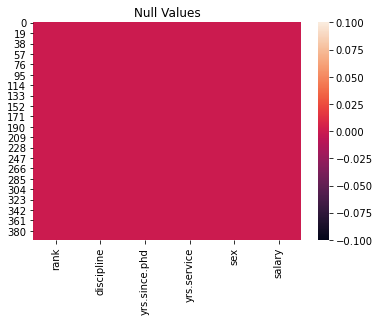

In [13]:
sns.heatmap(df1.isnull()) 
plt.title("Null Values")
plt.show()

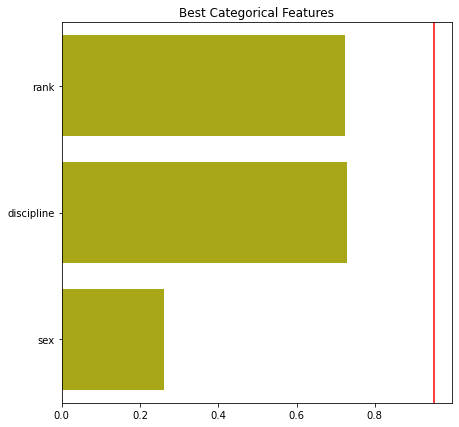

In [14]:
#Chi Square test for Categorical Columns  
#It seems that rank and discipline are relatively significant compare to sex.

from scipy.stats import chi2_contingency
l=[]
for i in obj:
    pvalue  = chi2_contingency(pd.crosstab(df1['salary'],df1[i]))[1]
    l.append(1-pvalue)
plt.figure(figsize=(7,7))
sns.barplot(x=l, y=obj, color ='y')
plt.title('Best Categorical Features')
plt.axvline(x=(1-0.05),color='r')
plt.show()

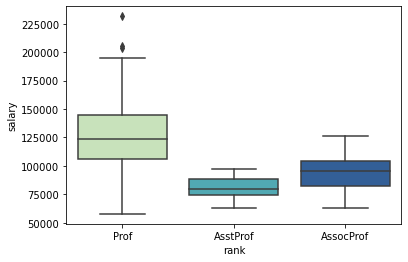

In [15]:
#BOX PLOT OF CATEGORICAL FEATURES

sns.boxplot(x='rank', y = 'salary', data=df1, palette= "YlGnBu");
#df[non_obj].boxplot(figsize=(15,5))

There is outliers in professor and average salary of professor is high.

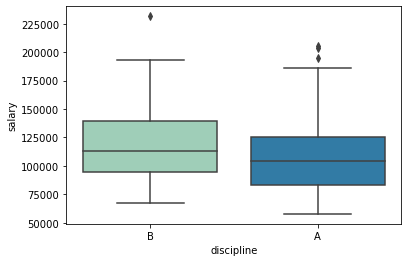

In [16]:
sns.boxplot(x='discipline', y = 'salary', data=df1, palette= "YlGnBu");
#df[non_obj].boxplot(figsize=(15,5))

Disciplines also contains outliers and salary of discoline B is higher compare to A.

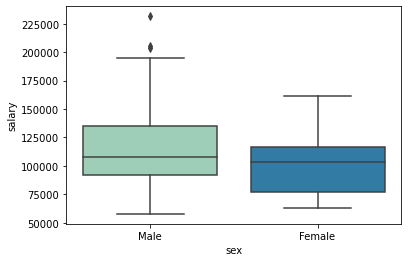

In [17]:
sns.boxplot(x='sex', y = 'salary', data=df1, palette= "YlGnBu");
#df[non_obj].boxplot(figsize=(15,5))

There are outliers in male sex which has to remove before processing of model.
Average Salary of male is higher than female.

In [18]:
non_obj = ['yrs.since.phd', 'yrs.service','salary']
len(obj)

3

In [19]:
def univariateAnalysis_numeric(non_obj,nbins):   
    plt.figure(figsize=(5,5))
    print("----------------------------------------------------------------------------")
    sns.displot(df1[non_obj], kde=True)#, color='blue')
    plt.title("Distribution of " + non_obj)
    plt.show()
    
    plt.figure(figsize=(5,5))
    print("----------------------------------------------------------------------------")
    ax = df1.boxplot(non_obj,patch_artist=True)
    #for box in ax['boxes']:
    #    box.set(color='y', linewidth=2)
    #    box.set(facecolor = 'green')
        #box.set(hatch = '/')
    plt.title("BoxPlot of " + non_obj)
    # plt.xlabel(non_obj)
    plt.ylabel('Values')
    plt.show()

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

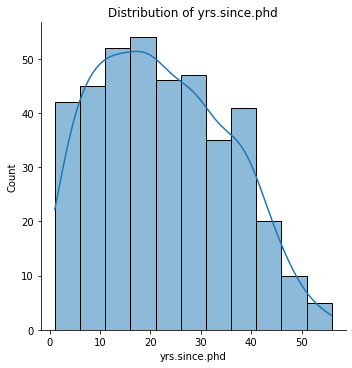

----------------------------------------------------------------------------


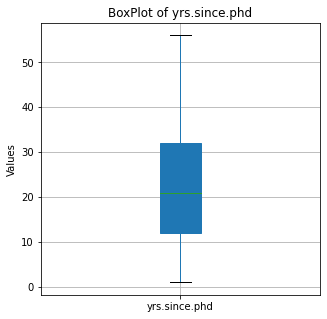

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

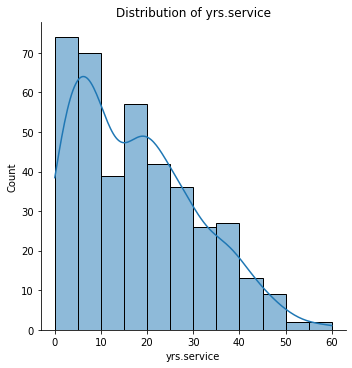

----------------------------------------------------------------------------


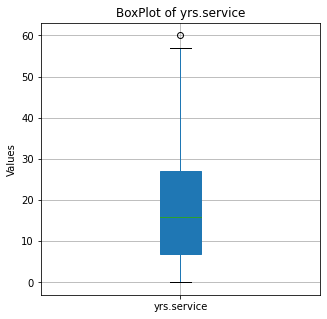

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

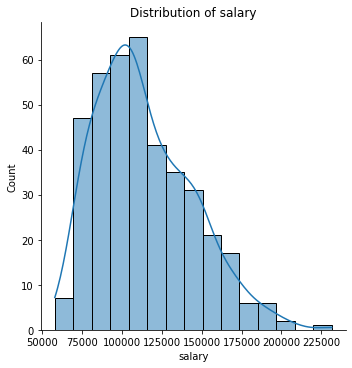

----------------------------------------------------------------------------


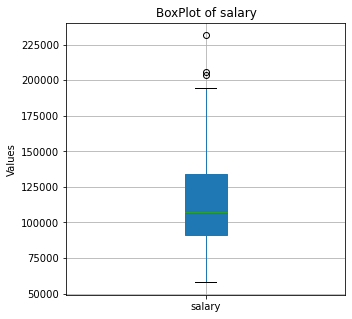

In [20]:
for x in non_obj:
    univariateAnalysis_numeric(x, 50);

Observation: we can see there is a variation/skewness in yrs.service,yrs.since.phd and salary and there are outliers  present in yrs.service and salary which has to be removed in further step.

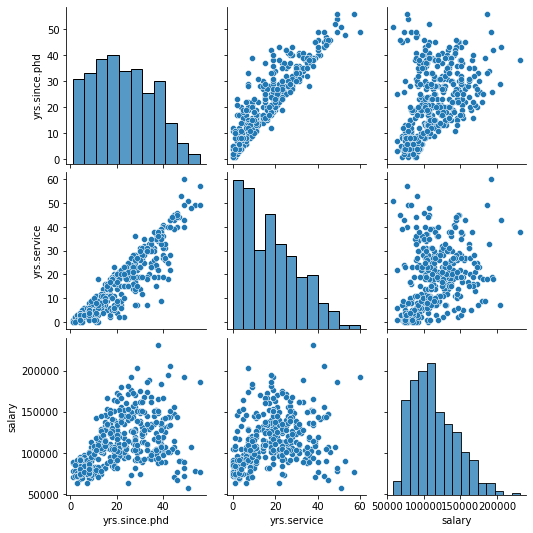

In [21]:
sns.pairplot(df1); #shows the realationship between each and every variable present in the daatset

we can see that there are some features like ‘rank’ ,'discipline'or ‘sex’ that are not numerical, they are categorical. 
Machine learning algorithms expect to work with numerical values,so these categorical features should be transformed.
So i hv used labelencoder here.

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for val in obj:
    df1[val]=le.fit_transform(df1[val].astype(str))
df1    

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
5,0,1,6,6,1,97000
6,2,1,30,23,1,175000
7,2,1,45,45,1,147765
8,2,1,21,20,1,119250
9,2,1,18,18,0,129000


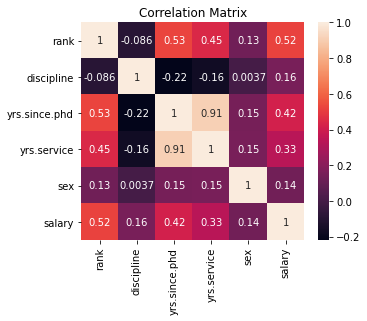

In [23]:
#Checking correlation
corr_mat=df1.corr()
plt.figure(figsize=[5,4])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

Observation : There is a very high correlation between yrs.service and yrs.since.phd appears to multicollinearity.
    Salary is 42% correlated with yrs.since.phd and 33% correlated with yrs.service. Salary is 14% correlated with sex and 16% correlated with discpline shows weak correlation so sex and rank can be removed from the column.

In [24]:
corr_matrix=df1.corr()  #correlated values of independent variable with the target varibale in sorted form
corr_matrix['salary'].sort_values(ascending=False)

salary           1.000000
rank             0.522207
yrs.since.phd    0.419231
yrs.service      0.334745
discipline       0.156084
sex              0.138610
Name: salary, dtype: float64

Lets see the data distribution among all the columns

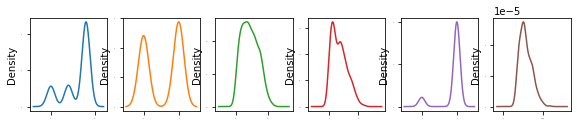

In [25]:
df1.plot(kind="density",subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

Thus we can see that skewness is present in multiple column,we will handle skewness in further step.

In [26]:
# Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[0.64925739, 0.91540317, 0.25754973, 0.02966908, 0.3300584 ,
        0.86091884],
       [0.64925739, 0.91540317, 0.17985426, 0.12429986, 0.3300584 ,
        1.96667226],
       [0.67256406, 0.91540317, 1.42298184, 1.12509795, 0.3300584 ,
        1.12249537],
       ...,
       [0.64925739, 1.09241483, 1.52944617, 0.56856036, 0.3300584 ,
        0.39564018],
       [0.64925739, 1.09241483, 0.20862311, 0.20128433, 0.3300584 ,
        0.60750187],
       [0.67256406, 1.09241483, 1.11219995, 1.04811348, 0.3300584 ,
        1.08001725]])

In [27]:
#Thus we see sex column is too much skewed and can be removed later steps

In [28]:
#cleaning outliers ,we have already seen outliers are present in sex,rank,etc columns,so now we will be removing it
#Z-SCORE TECHNIQUE
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df1))
z.shape

(397, 6)

In [29]:
threshold=3
print(np.where(z>3))

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364], dtype=int64), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
      dtype=int64))


In [30]:
z[9,4]

3.0297668523315746

In [31]:
z.shape

(397, 6)

In [32]:
df1.iloc[132]

rank                 0
discipline           0
yrs.since.phd       10
yrs.service          8
sex                  0
salary           77500
Name: 132, dtype: int64

In [33]:
df1=df1[(z<3).all(axis=1)] #outliers removed

In [34]:
df1

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
5,0,1,6,6,1,97000
6,2,1,30,23,1,175000
7,2,1,45,45,1,147765
8,2,1,21,20,1,119250
10,0,1,12,8,1,119800


In [35]:
#Spliting the independent and target variable in x & y before removing skewness
x=df1.drop(["salary", "yrs.since.phd"],axis=1) #drop yrs.since.phd as it is mutlicollinear with yrs.service
y=df1["salary"]

In [36]:
#checking skewness
x.skew()

rank          -1.241757
discipline    -0.182308
yrs.service    0.529464
sex            0.000000
dtype: float64

Thus we can see most the column of our datasetis having skewness ,so we will use power transform method 
to remove the skewness.We will remove it in data cleaning.

In [37]:
#Transforming the data to remove skewness
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [38]:
x.skew() #validating that skewness has been removed or not

rank          -0.905242
discipline    -0.182308
yrs.service   -0.138197
sex            0.000000
dtype: float64

Normalization:It is recommended to perform some type of scaling on numerical features. It is used to change the values
of numeric columns in the dataset to a common scale,without distorting differences in the ranges of values.

# MODEL 1-LinearRegression

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
ln=LinearRegression()

# splitting the dataframe

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=.33)
ln.fit(x_train,y_train)
pred_train=ln.predict(x_train) 

In [41]:
ln.score(x_train,y_train)  

0.3973510268582413

In [42]:
#predict the value
pred=ln.predict(x_test)
print("Predicted result salary:",pred)
print("actual salary",y_test)

Predicted result salary: [119367.10822422 119511.98266517 129888.43169654  83553.77853934
 120332.38929936 120715.46137766 131606.33336479 119219.59875841
  97489.75100755 131260.85028071 134175.48077237  97489.75100755
 116975.8587466   97489.75100755 120589.56531409 119069.31603162
 117177.06193154  90502.64384888 130897.33558678  91609.2081075
  84153.92369077 131081.51154189 127409.59876733  96082.46011841
  98416.00766472 130311.68606337  97985.60982331 120715.46137766
  74582.57488986 117372.11249193 131936.07865614  84649.78250653
 129189.47789818 128667.34061429  93127.67001804 133925.39263087
 115599.22157647 130897.33558678 132847.80998195 116552.60437976
 130512.88924832 121202.61579047 133797.72570411 129189.47789818
 131081.51154189 120332.38929936 116975.8587466  131606.33336479
 117561.50827    117561.50827    115331.51329751 117372.11249193
 118916.10948656 132405.1433484  117372.11249193  91087.07082361
  85080.18034794 129432.31689731 131435.69042952 130897.33558678
 

In [43]:
from sklearn.metrics import mean_squared_error,r2_score
print('error:')
print('Mean absolute error :',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error : 18665.358911207444
Mean squared error: 600196790.721012
Root Mean squared Error: 24498.91407228108


In [44]:
#r2 score--> coefficient of determination
#is the proportion of the variance in the dependent variable that is predictable from the independent variables
#i.e change coming in y whenever x is being changed
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.3276062334389176


In [45]:
#predict the salary by providing the values
t=np.array([0.0632,18.0,2.31,0.0])

In [46]:
t.shape

(4,)

In [47]:
t=t.reshape(1,-1)
t.shape

(1, 4)

In [48]:
ln.predict(t)

array([240497.00659018])

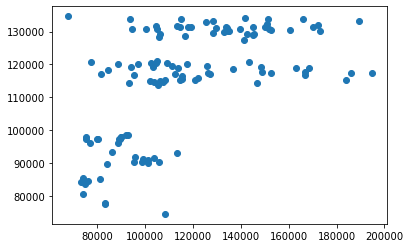

In [49]:
plt.scatter(y_test, pred)  

Using Lasso/Ridge Regularization to reduce overfitting

In [50]:
#Regularization
from sklearn.linear_model import Lasso,Ridge

In [51]:
ls=Lasso(alpha=0.0001)
#ls=Lasso(alpha=1.0)#default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.3973510268582413

In [52]:
ls.score(x_test, y_test)

0.3276062337992137

 Hyperparameter tuning using  GRIDSEARCHCV

In [53]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


In [54]:
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Lasso()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x_train,y_train)
print(grid)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})


In [55]:
#summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

0.3795211952909875
0
{'alpha': 0}


In [64]:
from sklearn import linear_model
param_grid = {
    'alpha':[1,3,6,7,8 ], # 6, 7, 8 
    'tol':[0.000001, 0.00001], # 0.00001
    'max_iter': [300, 400, 500], # 400, 300, 
    'selection' : ['random', 'cyclic'] # cyclic
    }

lsr = linear_model.Lasso(random_state =45)

grid_search = GridSearchCV(estimator = lsr, param_grid = param_grid, cv = 5, return_train_score = True) #using cross validation

In [65]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(random_state=45),
             param_grid={'alpha': [1, 3, 6, 7, 8], 'max_iter': [300, 400, 500],
                         'selection': ['random', 'cyclic'],
                         'tol': [1e-06, 1e-05]},
             return_train_score=True)

In [66]:
grid_search.best_params_

{'alpha': 8, 'max_iter': 300, 'selection': 'cyclic', 'tol': 1e-05}

In [67]:
best_grid = grid_search.best_estimator_
best_grid

Lasso(alpha=8, max_iter=300, random_state=45, tol=1e-05)

In [68]:
best_grid.coef_

array([16000.54814776,  6453.67384681,  2343.71768498,     0.        ])

In [69]:
# R square on training data
best_grid.score(x_train, y_train)

0.39441889560709875

In [70]:
# R square on testing data
best_grid.score(x_test, y_test)

0.3337615278493222

Conlusion:Thus we see that using hyperparameter ,the score has improved compare to linear regression model,we may choose model Lasso Regression after hyperparametertuning.